<a href="https://colab.research.google.com/github/Anastasia-Sim/PoW-QCSA-fa22/blob/main/QuantumHash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Hash Block
In this notebook, we constructed a proof of concept of our "quantum hash function" that we will try to crack with Grover's to assert quantum dominance over the classical brute force strategy. For our case, our hash is just a 3-bit one-to-one mapping of possible 3-bit inputs.


In [75]:
#Importing all the necessary libraries
!pip install qiskit matplotlib

import qiskit
import matplotlib

from qiskit import QuantumCircuit, assemble, Aer, circuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Hash Function/Gate Creation

In [76]:
hash_circ = QuantumCircuit(3)
hash_gate = Operator([
    [0,0,0,0,0,0,0,1],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0],
    [0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0]
])

hash_gate.name = "Hash Gate"
hash_dagger = hash_gate.conjugate().transpose()
hash_gate.name = "Hash Dagger"

#Hash Testing

In this specific test, we will be inputting bit string 110, we should expect 101 as our output

In [77]:
#Testing input 110 -> should get 101
n_qubits = 3
controls = QuantumRegister(n_qubits)
outputs = ClassicalRegister(n_qubits)
circuit = QuantumCircuit(controls, outputs)

circuit.x(controls[1:3])
circuit.draw()

q16_0: ─────
       ┌───┐
q16_1: ┤ X ├
       ├───┤
q16_2: ┤ X ├
       └───┘
c16_0: ═════
            
c16_1: ═════
            
c16_2: ═════

In [78]:
circuit.append(hash_gate, [0,1,2])
circuit.barrier(controls)

circuit.measure(controls, outputs)
circuit.draw()

┌──────────┐ ░ ┌─┐      
q16_0: ─────┤0         ├─░─┤M├──────
       ┌───┐│          │ ░ └╥┘┌─┐   
q16_1: ┤ X ├┤1 Unitary ├─░──╫─┤M├───
       ├───┤│          │ ░  ║ └╥┘┌─┐
q16_2: ┤ X ├┤2         ├─░──╫──╫─┤M├
       └───┘└──────────┘ ░  ║  ║ └╥┘
c16_0: ═════════════════════╩══╬══╬═
                               ║  ║ 
c16_1: ════════════════════════╩══╬═
                                  ║ 
c16_2: ═══════════════════════════╩═

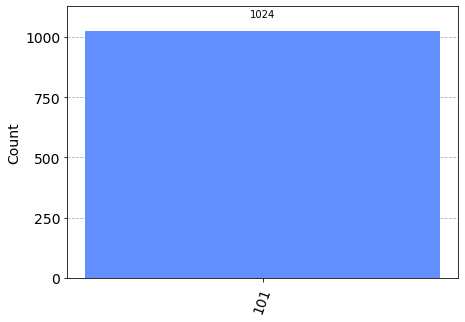

In [79]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

We got 101! It works!

#Hash Inverse Testing

Testing that the hash inverse gives us the desired response. In this specific case, we put in 110 and get 110.

In [80]:
#Testing input 110 -> should get 101
n_qubits = 3
controls = QuantumRegister(n_qubits)
outputs = ClassicalRegister(n_qubits)
circuit = QuantumCircuit(controls, outputs)

circuit.x(controls[1:3])
circuit.draw()

q17_0: ─────
       ┌───┐
q17_1: ┤ X ├
       ├───┤
q17_2: ┤ X ├
       └───┘
c17_0: ═════
            
c17_1: ═════
            
c17_2: ═════

In [81]:
circuit.append(hash_gate, [0,1,2])
circuit.append(hash_dagger, [0,1,2])
circuit.barrier(controls)

circuit.measure(controls, outputs)
circuit.draw()

┌──────────┐┌──────────┐ ░ ┌─┐      
q17_0: ─────┤0         ├┤0         ├─░─┤M├──────
       ┌───┐│          ││          │ ░ └╥┘┌─┐   
q17_1: ┤ X ├┤1 Unitary ├┤1 Unitary ├─░──╫─┤M├───
       ├───┤│          ││          │ ░  ║ └╥┘┌─┐
q17_2: ┤ X ├┤2         ├┤2         ├─░──╫──╫─┤M├
       └───┘└──────────┘└──────────┘ ░  ║  ║ └╥┘
c17_0: ═════════════════════════════════╩══╬══╬═
                                           ║  ║ 
c17_1: ════════════════════════════════════╩══╬═
                                              ║ 
c17_2: ═══════════════════════════════════════╩═

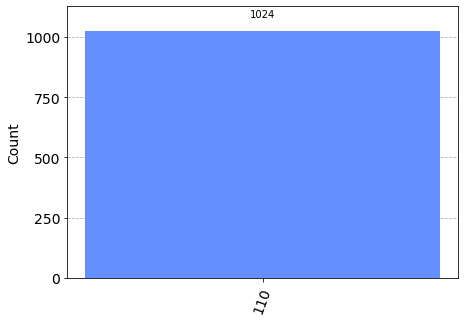

In [82]:
# We begin by declaring a simulator for our circuit to run on
sim = Aer.get_backend('aer_simulator') 
# We run the simulator with sim.run(QUANTUM CIRCUIT),
# And we get the resulting values with .result()
result = sim.run(circuit).result()
# We then collect the results using .get_counts()
counts = result.get_counts()
# Visualization
plot_histogram(counts)

We inputted 110 and got back 110, the inverse hash works!